In [164]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  


from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
yf.pdr_override() 


import matplotlib.pyplot as plt
#import statsmodels.tsa.seasonal as smt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import datetime as dt
from sklearn import linear_model 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))
import os
data_path = "/notebooks/stock_data_analysis/data_2/Stocks"
os.chdir(data_path)

filenames = [x for x in os.listdir(data_path) if x.endswith('.txt') and os.path.getsize(x) > 0]



In [165]:
stock_name = []
for item in filenames:
    name = item.split(".")[0]
    stock_name.append(name)


In [166]:
import random

In [167]:
stock_buy = random.sample(stock_name, 1000)


In [168]:
len(stock_buy)

1000

In [169]:
def get_data(symbol, data_source = 'goole', start_date = '1900-11-15', end_date = '2017-12-17', last_item = 10):
    df = pdr.get_data_yahoo(symbol, start_date, end_date)
    return df

    

In [170]:
len(data_get)

465

In [171]:
name_stock = []
data_get = {}
for item in stock_buy:
    stock_name = item.upper()
    print stock_name
    stock_data = get_data(stock_name)
    if not stock_data.empty:
        data_get[stock_name] = stock_data
        name_stock.append(stock_name)


        
    

PVAC
[*********************100%***********************]  1 of 1 downloadedGFED
[*********************100%***********************]  1 of 1 downloadedGPACW
[*********************100%***********************]  1 of 1 downloadedOMN
[*********************100%***********************]  1 of 1 downloadedMKL
[*********************100%***********************]  1 of 1 downloadedGSAT
[*********************100%***********************]  1 of 1 downloadedINN_D
[*********************100%***********************]  1 of 1 downloadedCNTF
[*********************100%***********************]  1 of 1 downloadedCWBC
[*********************100%***********************]  1 of 1 downloadedALRM
[*********************100%***********************]  1 of 1 downloadedFWRD
[*********************100%***********************]  1 of 1 downloadedFEIM
[*********************100%***********************]  1 of 1 downloadedCHSP
[*********************100%***********************]  1 of 1 downloadedALP_Q
[*********************100%******

[*********************100%***********************]  1 of 1 downloadedFOMX
[*********************100%***********************]  1 of 1 downloadedSPOK
[*********************100%***********************]  1 of 1 downloadedSVA
[*********************100%***********************]  1 of 1 downloadedGGN_B
[*********************100%***********************]  1 of 1 downloadedWINS
[*********************100%***********************]  1 of 1 downloadedATH
[*********************100%***********************]  1 of 1 downloadedBUFF
[*********************100%***********************]  1 of 1 downloadedMINDP
[*********************100%***********************]  1 of 1 downloadedCCC
[*********************100%***********************]  1 of 1 downloadedFPH
[*********************100%***********************]  1 of 1 downloadedCORR
[*********************100%***********************]  1 of 1 downloadedBRACW
[*********************100%***********************]  1 of 1 downloadedNGLS_A
[*********************100%***********

[*********************100%***********************]  1 of 1 downloadedNEOS
[*********************100%***********************]  1 of 1 downloadedCPN
[*********************100%***********************]  1 of 1 downloadedGDO
[*********************100%***********************]  1 of 1 downloadedOR
[*********************100%***********************]  1 of 1 downloadedGPI
[*********************100%***********************]  1 of 1 downloadedNWS
[*********************100%***********************]  1 of 1 downloadedSCHK
[*********************100%***********************]  1 of 1 downloadedFPRX
[*********************100%***********************]  1 of 1 downloadedVTEB
[*********************100%***********************]  1 of 1 downloadedDUK
[*********************100%***********************]  1 of 1 downloadedEGBN
[*********************100%***********************]  1 of 1 downloadedBNFT
[*********************100%***********************]  1 of 1 downloadedBPT
[*********************100%********************

[*********************100%***********************]  1 of 1 downloadedLADR
[*********************100%***********************]  1 of 1 downloadedGLQ
[*********************100%***********************]  1 of 1 downloadedCVU
[*********************100%***********************]  1 of 1 downloadedESNT
[*********************100%***********************]  1 of 1 downloadedCBFV
[*********************100%***********************]  1 of 1 downloadedRBA
[*********************100%***********************]  1 of 1 downloadedNVEC
[*********************100%***********************]  1 of 1 downloadedFPI
[*********************100%***********************]  1 of 1 downloadedJHSC
[*********************100%***********************]  1 of 1 downloadedQGTA
[*********************100%***********************]  1 of 1 downloadedACAD
[*********************100%***********************]  1 of 1 downloadedNJR
[*********************100%***********************]  1 of 1 downloadedPICO
[*********************100%*****************

[*********************100%***********************]  1 of 1 downloadedSSI
[*********************100%***********************]  1 of 1 downloadedBAC_L
[*********************100%***********************]  1 of 1 downloadedAMKR
[*********************100%***********************]  1 of 1 downloadedPHII
[*********************100%***********************]  1 of 1 downloadedCADE
[*********************100%***********************]  1 of 1 downloadedAIMC
[*********************100%***********************]  1 of 1 downloadedMATW
[*********************100%***********************]  1 of 1 downloadedAMRK
[*********************100%***********************]  1 of 1 downloadedSIRI
[*********************100%***********************]  1 of 1 downloadedOUSM
[*********************100%***********************]  1 of 1 downloadedPFBX
[*********************100%***********************]  1 of 1 downloadedLOW
[*********************100%***********************]  1 of 1 downloadedEGLT
[*********************100%*************

[*********************100%***********************]  1 of 1 downloadedOSG
[*********************100%***********************]  1 of 1 downloadedVVR
[*********************100%***********************]  1 of 1 downloadedMZA
[*********************100%***********************]  1 of 1 downloadedJE
[*********************100%***********************]  1 of 1 downloadedFDBC
[*********************100%***********************]  1 of 1 downloadedCPSH
[*********************100%***********************]  1 of 1 downloadedOXBR
[*********************100%***********************]  1 of 1 downloadedLVHE
[*********************100%***********************]  1 of 1 downloadedPRAH
[*********************100%***********************]  1 of 1 downloadedCELP
[*********************100%***********************]  1 of 1 downloadedNRO
[*********************100%***********************]  1 of 1 downloadedAQ
[*********************100%***********************]  1 of 1 downloadedHSON
[*********************100%********************

[*********************100%***********************]  1 of 1 downloadedOFG
[*********************100%***********************]  1 of 1 downloadedTRMT
[*********************100%***********************]  1 of 1 downloadedBBGI
[*********************100%***********************]  1 of 1 downloadedSOGO
[*********************100%***********************]  1 of 1 downloadedPSL
[*********************100%***********************]  1 of 1 downloadedTSRI
[*********************100%***********************]  1 of 1 downloadedHIE
[*********************100%***********************]  1 of 1 downloadedKMG
[*********************100%***********************]  1 of 1 downloadedCNACW
[*********************100%***********************]  1 of 1 downloadedBKSC
[*********************100%***********************]  1 of 1 downloadedHAS
[*********************100%***********************]  1 of 1 downloadedRY
[*********************100%***********************]  1 of 1 downloadedCHFN
[*********************100%******************

[*********************100%***********************]  1 of 1 downloadedRLJ_A
[*********************100%***********************]  1 of 1 downloadedFPP
[*********************100%***********************]  1 of 1 downloadedPVAL
[*********************100%***********************]  1 of 1 downloadedRYTM
[*********************100%***********************]  1 of 1 downloadedBKEP
[*********************100%***********************]  1 of 1 downloadedDXLG
[*********************100%***********************]  1 of 1 downloadedLFEQ
[*********************100%***********************]  1 of 1 downloadedJAKK
[*********************100%***********************]  1 of 1 downloadedFCF
[*********************100%***********************]  1 of 1 downloadedYORW
[*********************100%***********************]  1 of 1 downloadedCYRN
[*********************100%***********************]  1 of 1 downloadedJPIH
[*********************100%***********************]  1 of 1 downloadedAPRN
[*********************100%*************

[*********************100%***********************]  1 of 1 downloadedGGM
[*********************100%***********************]  1 of 1 downloadedKTOS
[*********************100%***********************]  1 of 1 downloadedCELG
[*********************100%***********************]  1 of 1 downloadedPPT
[*********************100%***********************]  1 of 1 downloadedNYMTP
[*********************100%***********************]  1 of 1 downloadedFMBI
[*********************100%***********************]  1 of 1 downloadedCMT
[*********************100%***********************]  1 of 1 downloadedEMI
[*********************100%***********************]  1 of 1 downloadedGOOS
[*********************100%***********************]  1 of 1 downloadedYESR
[*********************100%***********************]  1 of 1 downloadedARDC
[*********************100%***********************]  1 of 1 downloadedTAPR
[*********************100%***********************]  1 of 1 downloadedNOMD
[*********************100%***************

[*********************100%***********************]  1 of 1 downloadedFSACU
[*********************100%***********************]  1 of 1 downloaded

In [172]:
len(data_get.keys())

504

In [173]:
import json
pathModel = os.getcwd()  #
embedding_col_path = os.path.join(pathModel, "stock_data.json")

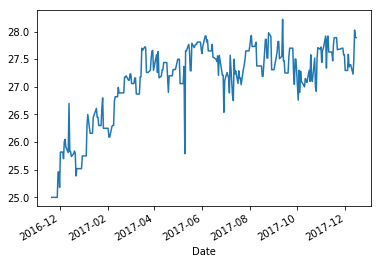

In [174]:
data_get[data_get.keys()[10]].Close.plot()

In [175]:
from sklearn.preprocessing import MinMaxScaler
def data_normalize(df, col):
    data_close = np.reshape(df[col], (df[col].shape[0], 1))
    scaler = MinMaxScaler()
    result_get = scaler.fit_transform(data_close)
    return result_get

def binning_data(data, num_embedding = 1000):
    bins = np.linspace(0, 1, num_embedding)
    inds = np.digitize(data, bins)
    return inds


def get_data(file_name):
    file_name = os.path.join('/notebooks/stock_data_analysis/data_2/Stocks', file_name)
    df = pd.read_csv(file_name, sep=',')
    #combine attributes
    #combine high and low by avg
    #combine open and close by avg
    #combine avgHighLow and avgOpenClose
    df['Price'] = (df['High'] + df['Low'] + df['Open'] + df['Close'])/4
    #take log as this flattens the data more, resulting in a better prediction
    df['Price'] = np.log(df['Price'])

    #drop obsolete columns for faster processing
    columns2Drop = [] #['High', 'Low', 'Open', 'Close', 'OpenInt']
    df = df.drop(labels=columns2Drop, axis=1)

    #create new attribute of "movement"
    df['Volume*Price'] = df['Volume'] * df['Price']
    # print(df)

    label = filename
    df['Label'] = label
    df['Date'] = pd.to_datetime(df['Date'])
    #conver data to an number so we can fit it to LinearRegression()
#     df['Date'] = df['Date'].map(dt.datetime.toordinal)

    #data.append(df)
    return df

In [176]:
data_get.keys()

['CPK',
 'MVF',
 'CPN',
 'IBUY',
 'RYB',
 'CPG',
 'JWN',
 'SID',
 'ERIE',
 'BWP',
 'LVHE',
 'AQ',
 'KYN',
 'OIIL',
 'STKL',
 'PTNR',
 'OUSM',
 'ISMD',
 'GV',
 'OCSL',
 'WRB',
 'WRI',
 'MNKD',
 'GD',
 'RDWR',
 'CLWT',
 'MAR',
 'DDWM',
 'PQG',
 'LAD',
 'WKHS',
 'MAC',
 'DIAX',
 'SMHD',
 'CIVBP',
 'AAP',
 'EGBN',
 'BEL',
 'FTXR',
 'HBMD',
 'PCQ',
 'ASET',
 'PCH',
 'ESIO',
 'SREV',
 'HUN',
 'FEIM',
 'FTS',
 'MHLD',
 'CUNB',
 'STBA',
 'TRCO',
 'FIVE',
 'FTF',
 'NOM',
 'NOK',
 'CBS',
 'HLG',
 'TJX',
 'PFFR',
 'GLO',
 'REV',
 'MGPI',
 'CYAD',
 'IDTI',
 'GLQ',
 'MSFT',
 'MDVX',
 'WHG',
 'BST',
 'ASPN',
 'BSL',
 'LEN-B',
 'BSF',
 'GGN',
 'SCHK',
 'ELLI',
 'MKL',
 'BFAM',
 'REFR',
 'NUSC',
 'BRCD',
 'FOMX',
 'XNET',
 'PAHC',
 'CLSN',
 'XTH',
 'WBIA',
 'PLPC',
 'MARK',
 'EDR',
 'SO',
 'SN',
 'LOW',
 'GIFI',
 'OXBR',
 'RNDB',
 'COHN',
 'FFNW',
 'SHNY',
 'BAA',
 'MYOV',
 'TOT',
 'XHR',
 'ALGT',
 'ERC',
 'USAS',
 'ABAX',
 'MPW',
 'CELP',
 'HSGX',
 'BATRA',
 'III',
 'CNTF',
 'ABC',
 'ABE',
 'AGNCB',


In [177]:
len(data_get)

504

In [178]:
data = {}
for key in data_get.keys():
    df = data_get[key]
    binning_sentence = data_normalize(df, 'Close')
    inds = list(binning_data(binning_sentence).flat)
    data[key] = inds


In [179]:
len(data)

504

In [180]:
def get_label(data, len_seq = 10):
    y = []
    seq_x = []
    for i in range(0, len(data), len_seq):
        if i-10>=0 and i+1<len(data):
            list_data = data[i-10:i]
            next_data = data[i+1]
            if next_data > data[i]:
                label = 1
            else:
                label = 0
            y.append(label)
            seq_x.append(list_data)
    return seq_x, y

In [181]:
y = []
seq_x = []

for key in data.keys():
    item = data[key]
    
    one_x, one_y = get_label(item[:-10])
    y += one_y
    seq_x += one_x

In [182]:
len(seq_x)

173508

# For the prediction

In [183]:
input_data = []
stock_name = []
for key in data.keys():
    item = data[key]
    if len(item[-10:]) ==10:
        input_data.append(item[-10:])
        stock_name.append(key)

In [184]:
len(input_data)

499

In [185]:
len(input_data[:256])

256

In [186]:
import tensorflow as tf

sess=tf.Session()    
#First let's load meta graph and restore weights
saver = tf.train.import_meta_graph('/tmp/testing/stock_prediction_12_21/model.ckpt-1000.meta')


In [187]:
saver.restore(sess,tf.train.latest_checkpoint('/tmp/testing/stock_prediction_12_21/'))

INFO:tensorflow:Restoring parameters from /tmp/testing/stock_prediction_12_21/model.ckpt-1000


In [188]:
graph = tf.get_default_graph()
x = graph.get_tensor_by_name("input_seq:0")
seqlen = graph.get_tensor_by_name("input_len:0")
pred_prob = graph.get_tensor_by_name("pred_prob:0")

In [189]:
seqlen

<tf.Tensor 'input_len:0' shape=(?,) dtype=int32>

In [190]:
len(input_data)

499

In [191]:
#predict_list = np.concatenate((predict_list, predict_result), axis=0)



In [192]:
predict_list = []
for i in range(0, len(input_data), 64):
    print i
    input_x = input_data[i:i+64]
    input_len = np.array([10]*64)
    if len(input_x) == 64:
        feed_dict = {x:input_x,
             seqlen:input_len
             }
        predict_result = sess.run(pred_prob, feed_dict= feed_dict)
        if len(predict_list)<=0:
            predict_list = predict_result
        else:
            predict_list = np.concatenate((predict_list, predict_result), axis=0)



    

0
64
128
192
256
320
384
448


In [193]:
predict_result = predict_list

In [194]:
import pandas as pd

In [195]:
df = pd.DataFrame(predict_result, columns = ["prob_0", "prob_1"])

In [196]:
df.shape

(448, 2)

In [197]:
df.head(10)

,prob_0,prob_1
0,0.654415,0.345585
1,0.999982,0.000018
2,0.003418,0.996582
3,0.999404,0.000596
4,0.988132,0.011868
5,0.965335,0.034665
6,0.019755,0.980245
7,0.287207,0.712793
8,0.999904,0.000096
9,0.997602,0.002398


In [198]:
len(data_get.keys())

504

In [199]:
len(stock_name)

499

In [200]:
select_stock_price = {}
price = []
volumn = []
for name in stock_name[:predict_list.shape[0]]:
    select_stock_price[name] = data_get[name]["Close"][-1]
    price.append(data_get[name]["Close"][-1])
    volumn.append(data_get[name]["Volume"][-1])
    
    

In [201]:
df["stock_name"] = stock_name[:predict_list.shape[0]]
df["price"] = price
df["volumn"] = volumn

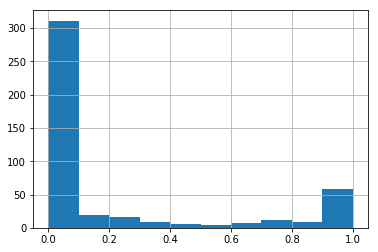

In [202]:
df.prob_1.hist()

In [203]:
df.sort_values(by = 'prob_1', ascending = False).head(30)

,prob_0,prob_1,stock_name,price,volumn
333,0.000074,0.999926,DSGX,28.250000,210100
335,0.000103,0.999897,COMB,24.969999,0
151,0.000159,0.999841,BRKS,24.990000,2363200
49,0.000171,0.999829,TRCO,42.240002,1111000
410,0.000172,0.999828,PRAN,3.300000,39100
35,0.000207,0.999793,BEL,12.350000,1798000
242,0.000403,0.999597,NWPX,18.490000,70600
76,0.000540,0.999460,ELLI,92.820000,322400
109,0.000600,0.999400,CELP,6.210000,59900
442,0.000744,0.999256,TEF,9.660000,2109300


In [204]:
def select_range(df,  min_value, max_value, col = "price"):
    return df[df[col].between(min_value, max_value, inclusive=False)]

In [205]:
df_range = select_range(df, 0, 6000)

In [206]:
data_get['VOYA'].Close.plot()

KeyError: 'VOYA'

In [207]:
data_volumn = df_range.sort_values(by = ['volumn', 'prob_1'], ascending = False)#.head(50)

In [208]:
data_volumn.iloc[0:100]

,prob_0,prob_1,stock_name,price,volumn
303,0.870494,0.129506,SIRI,5.370000,95984900
65,0.995907,0.004093,MSFT,86.849998,53936700
158,0.996074,0.003926,WFT,3.360000,38338500
317,0.999914,0.000086,KMI,17.930000,22931000
282,0.999988,0.000012,EGLT,1.220000,19337500
54,0.999865,0.000135,NOK,4.610000,19009600
248,0.997143,0.002857,WU,19.480000,18819900
292,0.983647,0.016353,GSAT,1.150000,18531000
82,0.998725,0.001275,XNET,15.770000,13927000
220,0.652448,0.347552,WBA,71.940002,11777000


In [209]:
data_get['Gafisa SA'].Close.plot()

KeyError: 'Gafisa SA'

In [210]:
data_volumn = select_range(data_volumn, 10, 90)
data_volumn = select_range(data_volumn, 10000, 100000000, col = 'volumn')


data_volumn.sort_values(by = ["prob_1"], ascending = False).iloc[0:100]

,prob_0,prob_1,stock_name,price,volumn
333,0.000074,0.999926,DSGX,28.250000,210100
151,0.000159,0.999841,BRKS,24.990000,2363200
49,0.000171,0.999829,TRCO,42.240002,1111000
35,0.000207,0.999793,BEL,12.350000,1798000
242,0.000403,0.999597,NWPX,18.490000,70600
312,0.001876,0.998124,STRL,17.290001,352100
2,0.003418,0.996582,CPN,15.070000,3923800
160,0.003966,0.996034,CHSP,28.250000,1589300
338,0.007753,0.992247,AAT,39.259998,712500
271,0.014904,0.985096,THC,14.340000,2631700


# get the csv by url

In [211]:
import csv
import urllib2

url_1 = 'http://www.nasdaq.com/screening/companies-by-industry.aspx?exchange=NASDAQ&render=download'
url_2 = "http://www.nasdaq.com/screening/companies-by-industry.aspx?exchange=NYSE&render=download"

In [212]:
import pandas as pd
data_1 = pd.read_csv(url_1)
data_2 = pd.read_csv(url_2)

In [213]:
stock_data = pd.concat([data_1, data_2])

In [214]:
stock_data.head(3)

,Symbol,Name,LastSale,MarketCap,ADR TSO,IPOyear,Sector,Industry,Summary Quote,Unnamed: 9
0,PIH,"1347 Property Insurance Holdings, Inc.",7.3001,4.368939e+07,NaN,2014.0,Finance,Property-Casualty Insurers,http://www.nasdaq.com/symbol/pih,NaN
1,TURN,180 Degree Capital Corp.,2.0300,6.317677e+07,NaN,NaN,Finance,Finance/Investors Services,http://www.nasdaq.com/symbol/turn,NaN
2,FLWS,"1-800 FLOWERS.COM, Inc.",11.2500,7.270252e+08,NaN,1999.0,Consumer Services,Other Specialty Stores,http://www.nasdaq.com/symbol/flws,NaN


In [215]:
data_volumn.head(3)

,prob_0,prob_1,stock_name,price,volumn
65,0.995907,0.004093,MSFT,86.849998,53936700
317,0.999914,0.000086,KMI,17.930000,22931000
248,0.997143,0.002857,WU,19.480000,18819900


In [216]:
data_merge = pd.merge(data_volumn, stock_data, how = 'left', left_on = 'stock_name', right_on = 'Symbol')


In [217]:
stock_data.shape

(6422, 10)

In [218]:
data_volumn.shape

(235, 5)

In [219]:
data_get['BBT'].Close.plot()

KeyError: 'BBT'

In [ ]:
data_merge.sort_values(by = ["prob_1"], ascending = False).iloc[0:70]


In [220]:
df_range.sort_values(by = 'prob_1', ascending = False).tail(30)

,prob_0,prob_1,stock_name,price,volumn
275,0.999967,0.000033,PHG,38.419998,1191300
69,0.999967,0.000033,BST,26.809999,89800
131,0.999967,0.000033,CBFV,30.750000,6000
258,0.999970,0.000030,FLQL,28.971001,3000
163,0.999970,0.000030,CEN,9.980000,230100
376,0.999971,0.000029,HOTR,2.100000,11700
270,0.999972,0.000028,GPT,27.760000,2361100
121,0.999975,0.000025,CACC,326.000000,252500
380,0.999976,0.000024,EBS,46.799999,764600
115,0.999979,0.000021,ABE,14.170000,8300


In [221]:
import tensorflow as tf

batch_size = 256
embedding_size = 64
generations = 5000
print_loss_every = 500
num_embedding = 1000
num_sampled = int(batch_size/2)    # Number of negative examples to sample.
window_size = 8       # How many words to consider left and right.

In [222]:
valid_examples = [1,20,30,149,293]


In [223]:
# Generate data randomly (N words behind, target, N words ahead)
def generate_batch_data(sentences, batch_size, window_size, method='skip_gram'):
    # Fill up data batch
    batch_data = []
    label_data = []
    while len(batch_data) < batch_size:
        # select random sentence to start
        idx = np.random.choice(len(sentences),1)
        rand_sentence = sentences[idx[0]]
        # Generate consecutive windows to look at
        window_sequences = [rand_sentence[max((ix-window_size),0):(ix+window_size+1)] for ix, x in enumerate(rand_sentence)]
        # Denote which element of each window is the center word of interest
        label_indices = [ix if ix<window_size else window_size for ix,x in enumerate(window_sequences)]
        
        # Pull out center word of interest for each window and create a tuple for each window
        if method=='skip_gram':
            batch_and_labels = [(x[y], x[:y] + x[(y+1):]) for x,y in zip(window_sequences, label_indices)]
            # Make it in to a big list of tuples (target word, surrounding word)
            tuple_data = [(x, y_) for x,y in batch_and_labels for y_ in y]
        elif method=='cbow':
            batch_and_labels = [(x[:y] + x[(y+1):], x[y]) for x,y in zip(window_sequences, label_indices)]
            # Make it in to a big list of tuples (target word, surrounding word)
            tuple_data = [(x_, y) for x,y in batch_and_labels for x_ in x]
        else:
            raise ValueError('Method {} not implemented yet.'.format(method))
            
        # extract batch and labels
        batch, labels = [list(x) for x in zip(*tuple_data)]
        batch_data.extend(batch[:batch_size])
        label_data.extend(labels[:batch_size])
    # Trim batch and label at the end
    batch_data = batch_data[:batch_size]
    label_data = label_data[:batch_size]
    
    # Convert to numpy array
    batch_data = np.array(batch_data)
    label_data = np.transpose(np.array([label_data]).astype(int))
    
    return(batch_data, label_data)

In [224]:
# Define Embeddings:
embeddings = tf.Variable(tf.random_uniform([num_embedding, embedding_size], -1.0, 1.0), name = "product_vec")

# NCE loss parameters
nce_weights = tf.Variable(tf.truncated_normal([num_embedding, embedding_size],
                                               stddev=1.0 / np.sqrt(embedding_size)))
nce_biases = tf.Variable(tf.zeros([num_embedding]))

# Create data/target placeholders
x_inputs = tf.placeholder(tf.int32, shape=[batch_size])
y_target = tf.placeholder(tf.int32, shape=[batch_size, 1])
valid_dataset = tf.constant(valid_examples, dtype=tf.int32)

# Lookup the word embedding:
embed = tf.nn.embedding_lookup(embeddings, x_inputs)

# Get loss from prediction
loss_get = tf.nn.nce_loss(weights=nce_weights,            # Tensor of shape(50000, 128)
                          biases=nce_biases,              # vector of zeros; len(128)
                          labels=y_target,            # labels == context words enums
                          inputs=embed,                   # Tensor of shape(128, 128)
                          num_sampled=num_sampled,        # 64: randomly chosen negative (rare) words
                          num_classes=num_embedding)   # 50000: by construction
loss = tf.reduce_mean(loss_get)



In [225]:
# Create optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1.0).minimize(loss)

tf.summary.scalar("loss", loss)

merged_summary_op = tf.summary.merge_all()

In [226]:
# Cosine similarity between words
norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), 1, keep_dims=True))
normalized_embeddings = embeddings / norm
valid_embeddings = tf.nn.embedding_lookup(normalized_embeddings, valid_dataset)
similarity = tf.matmul(valid_embeddings, normalized_embeddings, transpose_b=True)


In [ ]:
config = tf.ConfigProto()


try:
    sess = tf.Session(config=config)
except:
    sess = tf.Session(config=config)

In [ ]:
#Add variable initializer.
init = tf.global_variables_initializer()
sess.run(init)

In [ ]:
LOG_DIR = '/tmp/testing/stock2vec_11'
#tensorboard --logdir=/tmp/testing/example_2_2
summary_writer = tf.summary.FileWriter(LOG_DIR, graph=tf.get_default_graph())
print_valid_every = 100
# Run the skip gram model.
valid_words = [1,23,10,300]
loss_vec = []
loss_x_vec = []
for i in range(generations):
    batch_inputs, batch_labels = generate_batch_data(data, batch_size, window_size)
    feed_dict = {x_inputs : batch_inputs, y_target : batch_labels}

    # Run the train step
    _, summary = sess.run([optimizer, merged_summary_op], feed_dict=feed_dict)
    
    summary_writer.add_summary(summary, i)

    # Return the loss
    if (i+1) % print_loss_every == 0:
        loss_val = sess.run(loss, feed_dict=feed_dict)
        loss_vec.append(loss_val)
        loss_x_vec.append(i+1)
        print("Loss at step {} : {}".format(i+1, loss_val))
      
    # Validation: Print some random words and top 5 related words
#     if (i+1) % print_valid_every == 0:
#         sim = sess.run(similarity, feed_dict=feed_dict)
#         for j in range(len(valid_words)):
#             valid_word = name_dict[word_dictionary_rev[valid_examples[0]]] #word_dictionary_rev[valid_examples[j]]
#             top_k = 5 # number of nearest neighbors
#             nearest = (-sim[j, :]).argsort()[1:top_k+1]
#             #name_dict[word_dictionary_rev[valid_examples[0]]]
#             log_str = "Nearest to {}::".format(valid_word)
#             for k in range(top_k):
#                 close_word = name_dict[word_dictionary_rev[valid_examples[k]]] #word_dictionary_rev[nearest[k]]
#                 log_str = "%s %s," % (log_str, close_word)
#             print(log_str)
#             print "#################"
            

In [ ]:
LOG_DIR

In [ ]:
new_df = pd.DataFrame() #creates a new dataframe that's empty
new_df["index"] = range(num_embedding)
import csv
new_df.to_csv(os.path.join(LOG_DIR, 'output2.tsv'), sep='\t', quoting=csv.QUOTE_NONE)



In [ ]:
import sys
reload(sys)
sys.setdefaultencoding('utf-8')

In [ ]:
embeddings_matrix = sess.run(embeddings)    


In [ ]:
embeddings_matrix

In [ ]:
pathModel

In [ ]:
np.save(embedding_save_path, embeddings_matrix)


In [ ]:
embedding_save_path = os.path.join(pathModel, "data.npy")

In [ ]:

embedding_save_path = os.path.join(pathModel, "data")
data_get = np.load(embedding_save_path)

In [ ]:
save_picle(embeddings_matrix, embedding_save_path)

In [ ]:
embeddings_matrix.shape

In [ ]:
with open(embedding_save_path, 'w') as f:
    f.write(json.dumps(embeddings_matrix))


In [ ]:
from tensorflow.contrib.tensorboard.plugins import projector
# Create randomly initialized embedding weights which will be trained.

# Format: tensorflow/tensorboard/plugins/projector/projector_config.proto
config = projector.ProjectorConfig()

# You can add multiple embeddings. Here we add only one.
embedding = config.embeddings.add()
embedding.tensor_name = 'product_vec'
# Link this tensor to its metadata file (e.g. labels).
embedding.metadata_path = os.path.join(LOG_DIR, 'output2.tsv')

# Use the same LOG_DIR where you stored your checkpoint.
summary_writer = tf.summary.FileWriter(LOG_DIR)

# The next line writes a projector_config.pbtxt in the LOG_DIR. TensorBoard will
# read this file during startup.
projector.visualize_embeddings(summary_writer, config)

In [ ]:
saver = tf.train.Saver()

saver.save(sess, os.path.join(LOG_DIR, "model.ckpt"), 1000)


